In [1]:
# pip install basemap

# Import the neccessary libaries for the project

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# pd.set_option("max_columns",999999)
pd.set_option('max_rows',200)
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
import matplotlib.patches as mpatches
plt.style.use('fivethirtyeight')
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from mpl_toolkits.basemap import Basemap
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()


C:\Users\USER\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df = pd.read_csv("globalterrorismdb_0718dist.csv",encoding='latin1',low_memory=False)
df

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

## Rename some of the columns to depict its entries

In [4]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                     'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                     'nwound': 'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                     'weaptype1_txt':'Weapon_type','motive':'Motive'
                    },inplace=True)

## Number of null values in each columns 

In [5]:
df.isnull().sum()

eventid                    0
Year                       0
Month                      0
Day                        0
approxdate            172452
extended                   0
resolution            179471
country                    0
Country                    0
region                     0
Region                     0
state                    421
city                     434
latitude                4556
longitude               4557
specificity                6
vicinity                   0
location              126196
Summary                66129
crit1                      0
crit2                      0
crit3                      0
doubtterr                  1
alternative           152680
alternative_txt       152680
multiple                   1
success                    0
suicide                    0
attacktype1                0
AttackType                 0
attacktype2           175377
attacktype2_txt       175377
attacktype3           181263
attacktype3_txt       181263
targtype1     

## Fill empty cells with the suceeding characters

In [6]:
df.fillna(method='bfill',inplace=True)

In [7]:
# df.drop(columns=['approxdate','related'], axis=1, inplace=True)

## Drop the Evenid columns and make the effect applies to the initial dataframe

In [8]:
df.drop(columns=['eventid'], axis=1, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 134 entries, Year to related
dtypes: float64(55), int64(21), object(58)
memory usage: 185.7+ MB


## Check whether the backfill effect applied to all and find sum of null entries in the columns

In [10]:
df.isna().sum()

Year                      0
Month                     0
Day                       0
approxdate               20
extended                  0
resolution            77025
country                   0
Country                   0
region                    0
Region                    0
state                     0
city                      0
latitude                  0
longitude                 0
specificity               0
vicinity                  0
location                  1
Summary                   0
crit1                     0
crit2                     0
crit3                     0
doubtterr                 0
alternative               3
alternative_txt           3
multiple                  0
success                   0
suicide                   0
attacktype1               0
AttackType                0
attacktype2              19
attacktype2_txt          19
attacktype3             163
attacktype3_txt         163
targtype1                 0
Target_type               0
targsubtype1        

## Drop all null values

In [11]:
df.dropna(inplace=True)

## Now there is no null values in the dataset

In [12]:
df.isna().sum()

Year                  0
Month                 0
Day                   0
approxdate            0
extended              0
resolution            0
country               0
Country               0
region                0
Region                0
state                 0
city                  0
latitude              0
longitude             0
specificity           0
vicinity              0
location              0
Summary               0
crit1                 0
crit2                 0
crit3                 0
doubtterr             0
alternative           0
alternative_txt       0
multiple              0
success               0
suicide               0
attacktype1           0
AttackType            0
attacktype2           0
attacktype2_txt       0
attacktype3           0
attacktype3_txt       0
targtype1             0
Target_type           0
targsubtype1          0
targsubtype1_txt      0
corp1                 0
Target                0
natlty1               0
natlty1_txt           0
targtype2       

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102713 entries, 0 to 102712
Columns: 134 entries, Year to related
dtypes: float64(55), int64(21), object(58)
memory usage: 105.8+ MB


## Number of unique entries are there in each columns?

In [14]:
df.nunique()

Year                     41
Month                    13
Day                      32
approxdate              241
extended                  2
resolution             1828
country                 204
Country                 204
region                   12
Region                   12
state                  2515
city                  19994
latitude              19539
longitude             19519
specificity               5
vicinity                  3
location              17913
Summary               36257
crit1                     2
crit2                     2
crit3                     2
doubtterr                 3
alternative               5
alternative_txt           5
multiple                  2
success                   2
suicide                   2
attacktype1               9
AttackType                9
attacktype2               9
attacktype2_txt           9
attacktype3               7
attacktype3_txt           7
targtype1                22
Target_type              22
targsubtype1        

## Selecting relevant columns for analysis

In [15]:
df = df[['Year','Month','Day','Country','Region','state','latitude','longitude','city','AttackType','Killed','Wounded',
            'Target','Summary','Group','Target_type','Weapon_type','Motive','success']]

## First two rows of the dataset

In [17]:
df.head(2)

,Year,Month,Day,Country,Region,state,latitude,longitude,city,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,success
0,1970,7,2,Dominican Republic,Central America & Caribbean,Federal,18.456792,-69.951164,Santo Domingo,Assassination,1.0,0.0,Julio Guzman,1/1/1970: Unknown African American assailants ...,MANO-D,Private Citizens & Property,Unknown,To protest the Cairo Illinois Police Deparment,1
1,1970,0,0,Mexico,North America,Federal,19.371887,-99.086624,Mexico city,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",1/1/1970: Unknown African American assailants ...,23rd of September Communist League,Government (Diplomatic),Unknown,To protest the Cairo Illinois Police Deparment,1


##  The top 10 countries with the highest rate of successful Terrorism

In [24]:
df.groupby("Country")["success"].value_counts().sort_values(ascending=False).head(10)

Country         success
Colombia        1          6914
Iraq            1          6850
India           1          6224
Peru            1          5714
El Salvador     1          5227
Pakistan        1          4940
United Kingdom  1          3819
Philippines     1          3050
Spain           1          2803
Sri Lanka       1          2773
Name: success, dtype: int64

In [25]:
print('Country with most attacks : ', df['Country'].value_counts().idxmax())

Country with most attacks :  Colombia


##### From the above, Columbia has the highest number of successful terrorism

## 10 Regions with the most terrorism Kills

In [26]:
df.groupby("Region")['Killed'].value_counts().sort_values(ascending=True).head(10)

Region          Killed
Western Europe  270.0     1
South Asia      97.0      1
                93.0      1
                81.0      1
                80.0      1
                75.0      1
                72.0      1
                101.0     1
                68.0      1
                65.0      1
Name: Killed, dtype: int64

##### Western Europe has the last number of killed victims

### Top 5 years with most terriorism attacks

In [27]:
df.groupby('Year').size().reset_index(name='count').sort_values(by='count', ascending=False).head()

,Year,count
22,1992,5071
39,2010,4826
37,2008,4805
38,2009,4721
21,1991,4683


In [28]:

print('State with most attacks : ', df['state'].value_counts().idxmax())
print('Region with most attacks : ', df['Region'].value_counts().idxmax())

State with most attacks :  Northern Ireland
Region with most attacks :  Middle East & North Africa


In [29]:
df.shape

(102713, 19)

## Insight from the dataset

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102713 entries, 0 to 102712
Data columns (total 19 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         102713 non-null  int64  
 1   Month        102713 non-null  int64  
 2   Day          102713 non-null  int64  
 3   Country      102713 non-null  object 
 4   Region       102713 non-null  object 
 5   state        102713 non-null  object 
 6   latitude     102713 non-null  float64
 7   longitude    102713 non-null  float64
 8   city         102713 non-null  object 
 9   AttackType   102713 non-null  object 
 10  Killed       102713 non-null  float64
 11  Wounded      102713 non-null  float64
 12  Target       102713 non-null  object 
 13  Summary      102713 non-null  object 
 14  Group        102713 non-null  object 
 15  Target_type  102713 non-null  object 
 16  Weapon_type  102713 non-null  object 
 17  Motive       102713 non-null  object 
 18  success      102713 non-

In [31]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,102713.0,1993.518114,10.841983,1.970000e+03,1985.000000,1992.000000,2004.000000,2011.000000
Month,102713.0,6.410503,3.371172,0.000000e+00,4.000000,6.000000,9.000000,12.000000
Day,102713.0,15.314585,8.818110,0.000000e+00,8.000000,15.000000,23.000000,31.000000
latitude,102713.0,21.073293,21.742687,-5.315461e+01,7.108994,26.678779,36.354145,74.633553
longitude,102713.0,-830.952655,268920.275810,-8.618590e+07,-72.503885,23.762728,65.665857,179.366667
Killed,102713.0,2.395734,11.672245,0.000000e+00,0.000000,0.000000,1.000000,1384.000000
Wounded,102713.0,3.226398,44.602242,0.000000e+00,0.000000,0.000000,1.000000,8191.000000
success,102713.0,0.918345,0.273839,0.000000e+00,1.000000,1.000000,1.000000,1.000000


   # EXPLORATORY DATA ANALYSIS

##### Examining Terrorism treads over the years across various regions

In [26]:
year_attacks_region = df.groupby(['Year','Region']).size().reset_index(name='count')

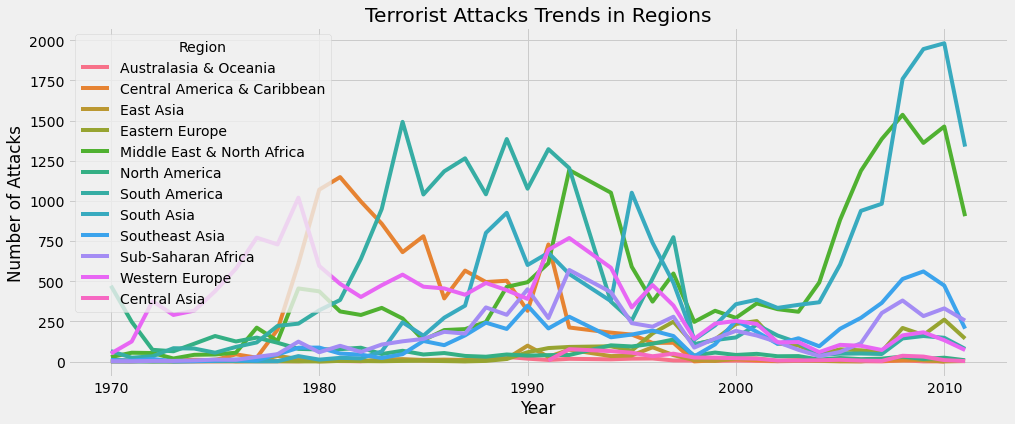

In [27]:
plt.subplots(figsize=(15,6))
sns.lineplot(x='Year',y='count',hue='Region',data=year_attacks_region)
plt.title('Terrorist Attacks Trends in Regions')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.show()

## Number Of Terrorist Activities By Region

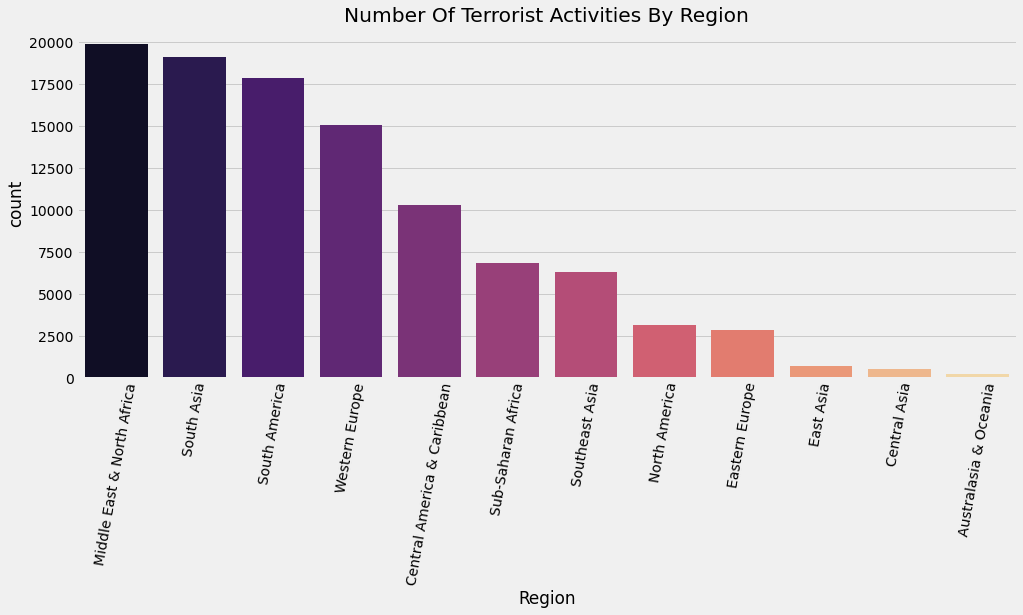

In [32]:
plt.subplots(figsize=(15,6))
sns.countplot(x='Region',data=df,palette='magma',order=df['Region'].value_counts().index)
plt.xticks(rotation=80)
plt.title('Number Of Terrorist Activities By Region');

## Regional Activities of Terrorist Groups

C:\Users\USER\AppData\Local\Temp/ipykernel_9016/116443859.py:15: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.

C:\Users\USER\AppData\Local\Temp/ipykernel_9016/116443859.py:15: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.

C:\Users\USER\AppData\Local\Temp/ipykernel_9016/116443859.py:15: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.

C:\Users\USER\AppData\Local\Temp/ipykernel_9016/116443859.py:15: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.

C:\Users\USER\AppData\Local\Temp/ipykernel_9016/116443859.py:15: UserWarning:

color is redundantly defi

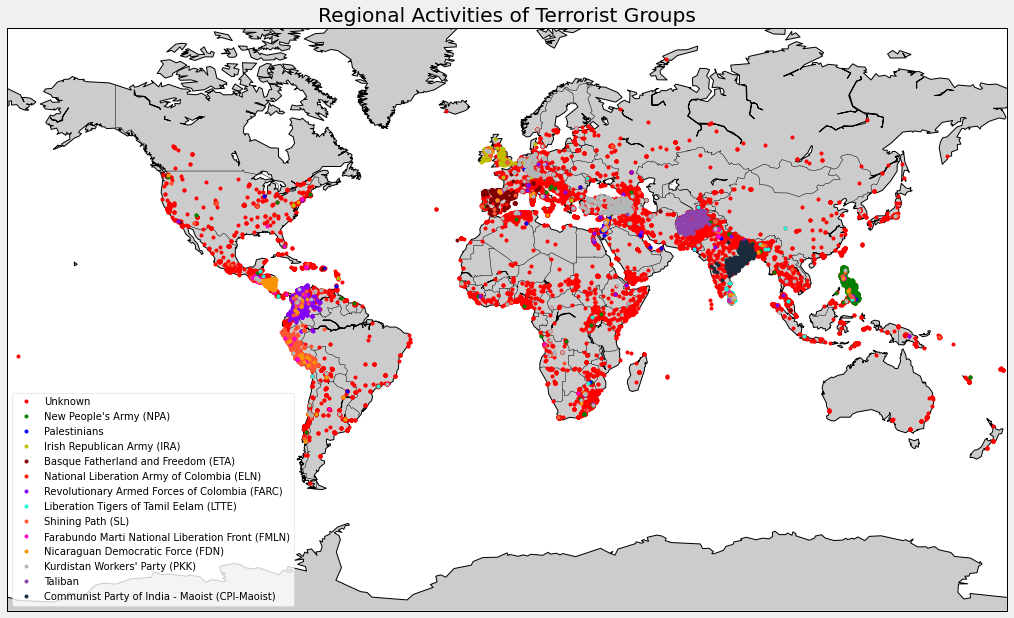

In [34]:
top_groups=df[df['Group'].isin(df['Group'].value_counts()[:14].index)]
m4 = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c',lat_0=True,lat_1=True)
m4.drawcoastlines()
m4.drawcountries()
m4.fillcontinents(lake_color='#fff')
m4.drawmapboundary(fill_color='#fff')
fig=plt.gcf()
fig.set_size_inches(22,10)
colors=['r','g','b','y','#800000','#ff1100','#8202fa','#20fad9','#ff5733','#fa02c6',"#f99504",'#b3b6b7','#8e44ad','#1a2b3c']
group=list(top_groups['Group'].unique())
def group_point(group,color,label):
    lat_group=list(top_groups[top_groups['Group']==group].latitude)
    long_group=list(top_groups[top_groups['Group']==group].longitude)
    x_group,y_group=m4(long_group,lat_group)
    m4.plot(x_group,y_group,'go',markersize=3,color=j,label=i)
for i,j in zip(group,colors):
    group_point(i,j,i)
legend=plt.legend(loc='lower left',frameon=True,prop={'size':10})
frame=legend.get_frame()
frame.set_facecolor('white')
plt.title('Regional Activities of Terrorist Groups');


In [35]:
data=df[['Killed', 'Wounded', 'Target', 'success']]

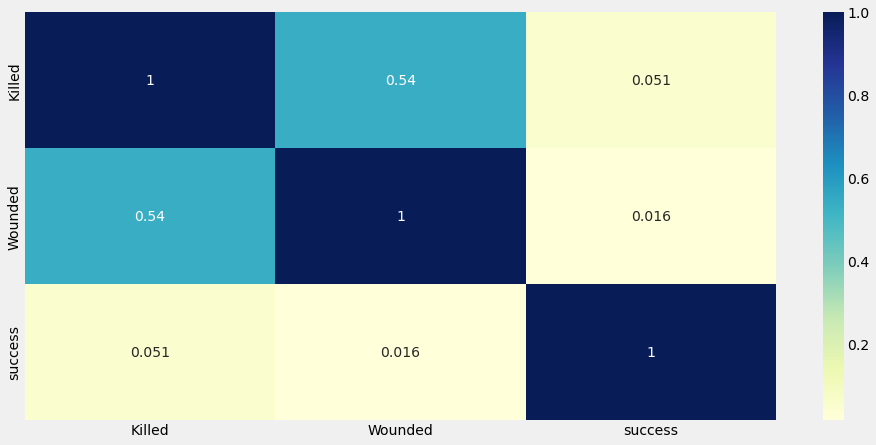

In [36]:
fig=plt.figure(figsize=(15,7))
sns.heatmap(data.corr(),cmap='YlGnBu',annot=True);

## Count the number of terrorism attack type in an orders form

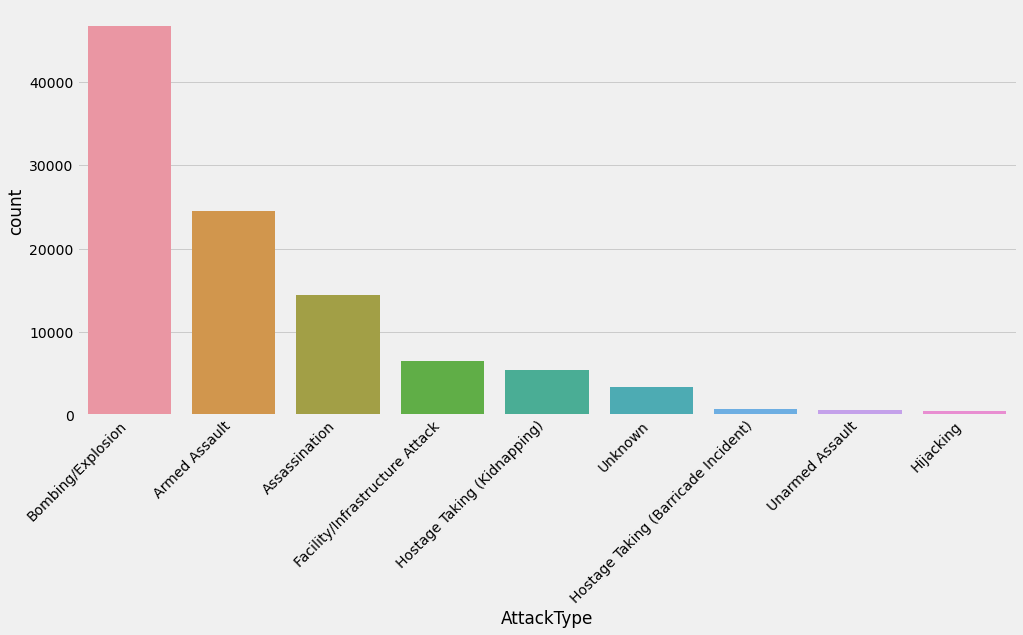

In [37]:
fig = plt.figure(figsize=(15, 7))
a = sns.countplot(x='AttackType', data=df,order=df['AttackType'].value_counts().index)
a.set_xticklabels(a.get_xticklabels(), rotation=45, ha='right');

#### The above shows that most of the terror attack is by Bombing/Explosion whereas Hijacking is relatively the least type of terrorism

In [38]:
df.columns

Index(['Year', 'Month', 'Day', 'Country', 'Region', 'state', 'latitude',
       'longitude', 'city', 'AttackType', 'Killed', 'Wounded', 'Target',
       'Summary', 'Group', 'Target_type', 'Weapon_type', 'Motive', 'success'],
      dtype='object')

In [39]:
df[["Region",'Killed']].groupby("Region").sum().sort_values(by='Killed',ascending=False)

,Killed
Region,
Middle East & North Africa,55254.0
South Asia,54598.0
Central America & Caribbean,39738.0
Sub-Saharan Africa,34088.0
South America,31927.0
Southeast Asia,11942.0
Western Europe,7535.0
Eastern Europe,4707.0
North America,4583.0


#### Middle East & North Africa are the regions with the highest killed

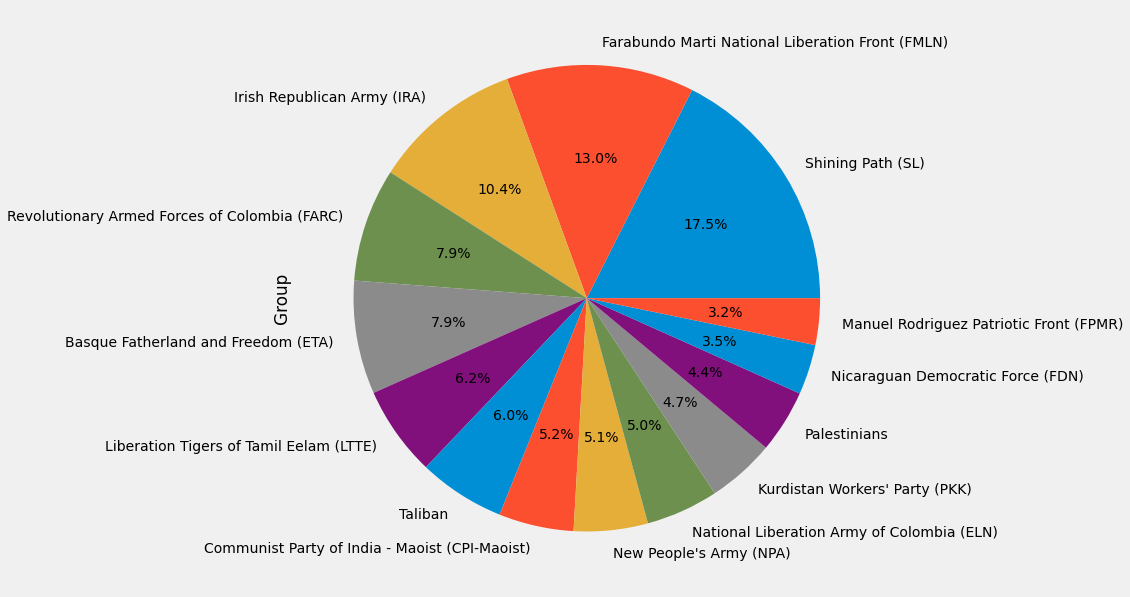

In [40]:
fig = plt.figure(figsize=(10,10 ))
df['Group'].value_counts()[1:15].plot.pie(autopct='%1.1f%%');


### Highest terrorist group is Shining Path(SL)